In [1]:
from src.reachability_analysis.simulation import get_test_label, run_scenario, get_data, get_initial_conditions
from src.clustering.run import load_config, get_cluster
from src.reachability_analysis.labeling_oracle import LABELS, LabelingOracleSINDData, LabelingOracleSVEAData, LabelingOracleROSData
from src.reachability_analysis.utils import load_data
import matplotlib.pyplot as plt
from PIL import Image
import os
import json
import pandas as pd


/home/sam/Desktop/Pedestrian_Project/.venv/lib/python3.9/site-packages/pypolycontain/operations.py:23: UserWarning: You don't have pydrake installed properly. Methods that rely on optimization may fail.
  warnings.warn("You don't have pydrake installed properly. Methods that rely on optimization may fail.")
/home/sam/Desktop/Pedestrian_Project/.venv/lib/python3.9/site-packages/pypolycontain/conversions.py:19: UserWarning: WARNING: You don't have CDD package installed. Unable to visualize polytopes. You may still visualize zonotopes.
  warnings.warn("WARNING: You don't have CDD package installed. Unable to visualize polytopes. You may still visualize zonotopes.")
/home/sam/Desktop/Pedestrian_Project/.venv/lib/python3.9/site-packages/pypolycontain/conversions.py:32: UserWarning: You don't have pydrake installed properly. Methods that rely on optimization may fail.
  warnings.warn("You don't have pydrake installed properly. Methods that rely on optimization may fail.")
/home/sam/Desktop/P

In [2]:
ROOT = os.getcwd()
ROOT_RESOURCES = os.getcwd() + '/resources'

In [3]:
REVERSED_LABELS = {value: key for key, value in LABELS.items()}

In [4]:
model_file = 'ROS_experiment_2024-07-31_11-43-35_m2u'

index = 2
index_data = 0
folder = 'experiments'

In [5]:
config_path = '/home/sam/Desktop/Pedestrian_Project/config-ros.json'

with open(config_path) as cnfg:
    config = json.load(cnfg)

In [6]:
from src.datasets.data import ROSData

config['data_dir'] = 'resources/test'
bag_reader = ROSData(config)

2024-07-31 14:08:21,580 | INFO : Loading 1 datasets files using 1 parallel processes ...


resources/test
[INFO]  Successfully created the data folder resources/test/reprocessed_2024-07-16-14-54-22.


In [7]:
bag_reader.feature_df

,x,y,vx,vy,ax,ay
data_chunk_len,,,,,,
0,-1019.638721,76.279057,0.000000,0.000000,0.0,0.0
0,-1019.638721,76.279057,0.000000,0.000000,0.0,0.0
0,-1019.708111,76.237210,0.000000,0.000000,0.0,0.0
0,-1019.708111,76.237210,0.000000,0.000000,0.0,0.0
0,-1019.773291,76.194921,0.000000,0.000000,0.0,0.0
...,...,...,...,...,...,...
424,-1020.385204,70.340078,0.000000,0.000000,0.0,0.0
424,-1020.385204,70.340078,0.000000,0.000000,0.0,0.0
424,-1020.351025,70.321645,0.000000,0.000000,0.0,0.0


In [8]:
# # # import pandas as pd
# # import os

# # Assuming bag_reader.all_df is your dataframe
# all_df = bag_reader.all_df

# # Directory where the folders will be created
# output_directory = "resources/test"

# # Create the output directory if it doesn't exist
# if not os.path.exists(output_directory):
#     os.makedirs(output_directory)

# # Get unique track IDs
# unique_track_ids = all_df['track_id'].unique()

# # Iterate over each unique track_id
# for track_id in unique_track_ids:
#     # Create a directory for each track_id
#     if '817' in track_id or '908' in track_id or '1015' in track_id:
#         track_dir = os.path.join(output_directory, str(track_id))
#         if not os.path.exists(track_dir):
#             os.makedirs(track_dir)
        
#         # Filter the dataframe for the current track_id
#         track_df = all_df[all_df['track_id'] == track_id]
        
#         # Save the filtered dataframe to a CSV file in the corresponding directory
#         csv_path = os.path.join(track_dir, f"{track_id}.csv")
#         track_df.to_csv(csv_path, index=False)

# print("CSV files have been created for each unique track_id.")

In [9]:
# # Directory containing the .bag files
# input_directory = "bags"

# # Output CSV file path
# output_csv = "bags/aggregated_data.csv"

# # List to hold all the parsed dataframes
# aggregated_data = []

# # Crawl through all .bag files in the directory
# for filename in os.listdir(input_directory):
#     if filename.endswith(".bag"):
#         filepath = os.path.join(input_directory, filename)
#         # Load and clean the data from the .bag file
#         df = ROSData.load_single(filepath)
#         aggregated_data.append(df)

# # Concatenate all the parsed dataframes into a single dataframe
# final_df = pd.concat(aggregated_data, ignore_index=True)

# # Save the aggregated dataframe to a CSV file
# final_df.to_csv(output_csv, index=False)


### Zonotopes

In [10]:
ROOT_RESOURCES = ROOT + '/resources'
config = load_config(folder=folder, model_file=model_file, index=index, index_data=index_data)

In [11]:
# test_labeling_oracle.all_df

In [12]:
# labeling_oracle = LabelingOracleROSData(config)
# labeling_oracle.load_data()

In [13]:
# df_chunked = labeling_oracle.create_chunks()[0]
# df_chunked.shape

In [14]:
# trajectory.shape

In [15]:
# import numpy as np
# from shapely.geometry import Polygon, LineString, Point
# import pypolycontain as pp
# from src.reachability_analysis.zonotope import zonotope


# trajectory, l = get_test_label(test_labeling_oracle)

# G_z = np.array([[0.5, 0, 0.25], [0, 0.5, 0.15]])
# # G_z = np.array([[4, 0, 2], [0, 4, 1.2]])
# z = zonotope(np.array([trajectory[0, -1, 0], trajectory[0, -1, 1]]), G_z)
# _ped_poly = Polygon(pp.to_V(z))

# for _t in df_chunked:
#     _x, _y = _t[:, 0], _t[:, 1]
#     _vx, _vy = _t[:, 2], _t[:, 3]
#     _line = LineString(list(zip(_x, _y)))
#     # if _line.intersects(_ped_poly):
#     #     print(12)
    

In [16]:
# labeling_oracle.all_df.describe()

In [17]:
# test_labeling_oracle.all_df

2024-07-31 14:08:29,118 | INFO : Loading 1 datasets files using 1 parallel processes ...


root_dir /home/sam/Desktop/Pedestrian_Project/resources/test/reprocessed_2024-07-16-14-54-22.bag_817
/home/sam/Desktop/Pedestrian_Project/resources/test/reprocessed_2024-07-16-14-54-22.bag_817 ['reprocessed_2024-07-16-14-54-22.bag_817.csv', '0.png']


/home/sam/Desktop/Pedestrian_Project/.venv/lib/python3.9/site-packages/torch/nn/modules/transformer.py:306: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer was not TransformerEncoderLayer
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")
2024-07-31 14:08:29,219 | INFO : Model:
TSTransformerEncoder(
  (project_inp): Linear(in_features=6, out_features=128, bias=True)
  (pos_enc): LearnablePositionalEncoding(
    (dropout): Dropout(p=0.0, inplace=False)
  )
  (transformer_encoder): TransformerEncoder(
    (layers): ModuleList(
      (0-2): 3 x TransformerBatchNormEncoderLayer(
        (self_attn): MultiheadAttention(
          (out_proj): NonDynamicallyQuantizableLinear(in_features=128, out_features=128, bias=True)
        )
        (linear1): Linear(in_features=128, out_features=512, bias=True)
        (dropout): Dropout(p=0.0, inplace=False)
        (linear2): Li

Loaded model from /home/sam/Desktop/Pedestrian_Project/experiments/ROS_experiment_2024-07-31_11-43-35_m2u/checkpoints/model_best.pth. Epoch: 86
Evaluating   0.0% | batch:         0 of         1	|	loss: 0.183693
Trajectory data shape need to be of shape  (n, m). Get 0 dimension as past trajectory
Load data from: /home/sam/Desktop/Pedestrian_Project/experiments/ROS_experiment_2024-07-31_11-43-35_m2u/eval/clusters
Load Annoy Model from: /home/sam/Desktop/Pedestrian_Project/experiments/ROS_experiment_2024-07-31_11-43-35_m2u/eval/clusters/annoy_index.ann
Name: reprocessed_2024-07-16-14-54-22.bag_817, {'c_1': 'Cluster: 1'}
CLUSTER 1


Calculating reachable sets: 100%|██████████| 48/48 [00:02<00:00, 18.08it/s]


Area of zonotope:  52.4647  m^2
Area of (baseline) zonotope:  88.3633  m^2


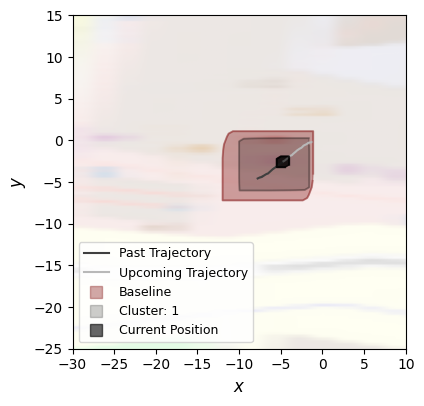

2024-07-31 14:08:49,422 | INFO : Loading 1 datasets files using 1 parallel processes ...


root_dir /home/sam/Desktop/Pedestrian_Project/resources/test/reprocessed_2024-07-16-14-54-22.bag_908
/home/sam/Desktop/Pedestrian_Project/resources/test/reprocessed_2024-07-16-14-54-22.bag_908 ['reprocessed_2024-07-16-14-54-22.bag_908.csv', '0.png']


/home/sam/Desktop/Pedestrian_Project/.venv/lib/python3.9/site-packages/torch/nn/modules/transformer.py:306: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer was not TransformerEncoderLayer
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")
2024-07-31 14:08:49,517 | INFO : Model:
TSTransformerEncoder(
  (project_inp): Linear(in_features=6, out_features=128, bias=True)
  (pos_enc): LearnablePositionalEncoding(
    (dropout): Dropout(p=0.0, inplace=False)
  )
  (transformer_encoder): TransformerEncoder(
    (layers): ModuleList(
      (0-2): 3 x TransformerBatchNormEncoderLayer(
        (self_attn): MultiheadAttention(
          (out_proj): NonDynamicallyQuantizableLinear(in_features=128, out_features=128, bias=True)
        )
        (linear1): Linear(in_features=128, out_features=512, bias=True)
        (dropout): Dropout(p=0.0, inplace=False)
        (linear2): Li

Loaded model from /home/sam/Desktop/Pedestrian_Project/experiments/ROS_experiment_2024-07-31_11-43-35_m2u/checkpoints/model_best.pth. Epoch: 86
Evaluating   0.0% | batch:         0 of         1	|	loss: 0.377716
Trajectory data shape need to be of shape  (n, m). Get 0 dimension as past trajectory
Load data from: /home/sam/Desktop/Pedestrian_Project/experiments/ROS_experiment_2024-07-31_11-43-35_m2u/eval/clusters
Load Annoy Model from: /home/sam/Desktop/Pedestrian_Project/experiments/ROS_experiment_2024-07-31_11-43-35_m2u/eval/clusters/annoy_index.ann
Name: reprocessed_2024-07-16-14-54-22.bag_908, {'c_1': 'Cluster: 1'}
CLUSTER 1


Calculating reachable sets: 100%|██████████| 48/48 [00:00<00:00, 48.44it/s]


Area of zonotope:  57.3362  m^2
Area of (baseline) zonotope:  47.446  m^2


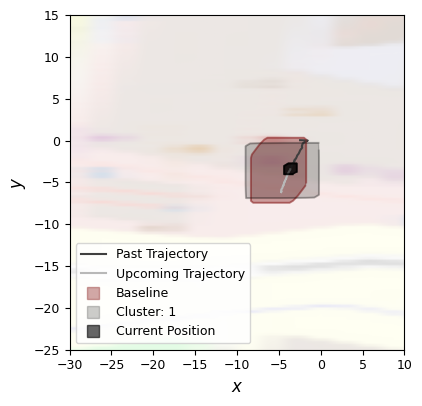

2024-07-31 14:09:09,558 | INFO : Loading 1 datasets files using 1 parallel processes ...


root_dir /home/sam/Desktop/Pedestrian_Project/resources/test/reprocessed_2024-07-16-14-54-22.bag_1015
/home/sam/Desktop/Pedestrian_Project/resources/test/reprocessed_2024-07-16-14-54-22.bag_1015 ['0.png', 'reprocessed_2024-07-16-14-54-22.bag_1015.csv']


/home/sam/Desktop/Pedestrian_Project/.venv/lib/python3.9/site-packages/torch/nn/modules/transformer.py:306: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer was not TransformerEncoderLayer
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")
2024-07-31 14:09:09,645 | INFO : Model:
TSTransformerEncoder(
  (project_inp): Linear(in_features=6, out_features=128, bias=True)
  (pos_enc): LearnablePositionalEncoding(
    (dropout): Dropout(p=0.0, inplace=False)
  )
  (transformer_encoder): TransformerEncoder(
    (layers): ModuleList(
      (0-2): 3 x TransformerBatchNormEncoderLayer(
        (self_attn): MultiheadAttention(
          (out_proj): NonDynamicallyQuantizableLinear(in_features=128, out_features=128, bias=True)
        )
        (linear1): Linear(in_features=128, out_features=512, bias=True)
        (dropout): Dropout(p=0.0, inplace=False)
        (linear2): Li

Loaded model from /home/sam/Desktop/Pedestrian_Project/experiments/ROS_experiment_2024-07-31_11-43-35_m2u/checkpoints/model_best.pth. Epoch: 86
Evaluating   0.0% | batch:         0 of         1	|	loss: 0.246832
Trajectory data shape need to be of shape  (n, m). Get 0 dimension as past trajectory
Load data from: /home/sam/Desktop/Pedestrian_Project/experiments/ROS_experiment_2024-07-31_11-43-35_m2u/eval/clusters
Load Annoy Model from: /home/sam/Desktop/Pedestrian_Project/experiments/ROS_experiment_2024-07-31_11-43-35_m2u/eval/clusters/annoy_index.ann
Name: reprocessed_2024-07-16-14-54-22.bag_1015, {'c_1': 'Cluster: 1'}
CLUSTER 1


Calculating reachable sets: 100%|██████████| 48/48 [00:00<00:00, 315.18it/s]


Area of zonotope:  61.1097  m^2
Area of (baseline) zonotope:  63.6629  m^2


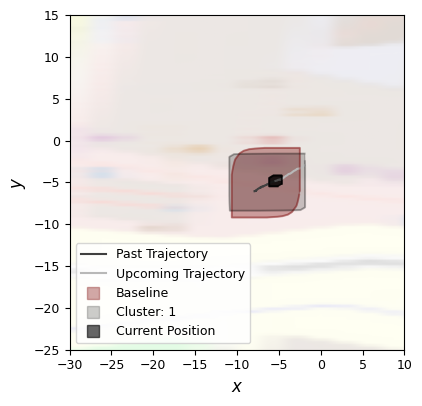

In [18]:
config['pattern'] = None

TEST_TRAJECTORIES = [
    'reprocessed_2024-07-16-14-54-22.bag_817',
    'reprocessed_2024-07-16-14-54-22.bag_908',
    'reprocessed_2024-07-16-14-54-22.bag_1015',
]
for name in TEST_TRAJECTORIES:
    config_test = config.copy()
    config_test['data_dir'] = ROOT_RESOURCES + f'/test/{name}'
    test_labeling_oracle = LabelingOracleROSData(config_test)
    test_labeling_oracle.load_data()

    trajectory, l = get_test_label(test_labeling_oracle)
    c, distance = get_cluster(config, test_labeling_oracle)
    test_cases = {f'c_{c}': f'Cluster: {c}'}

    print(f"Name: {name},", test_cases)
    print('CLUSTER', c)
    run_scenario(trajectory=trajectory, config=config, labels=test_cases, show_plot=True, baseline=True, save_plot=config_test['data_dir'])

Combine Final Images for Paper

FileNotFoundError: [Errno 2] No such file or directory: '/home/sam/Desktop/Pedestrian_Project/resources/test/cross_illegal_8_11_1/use.png'

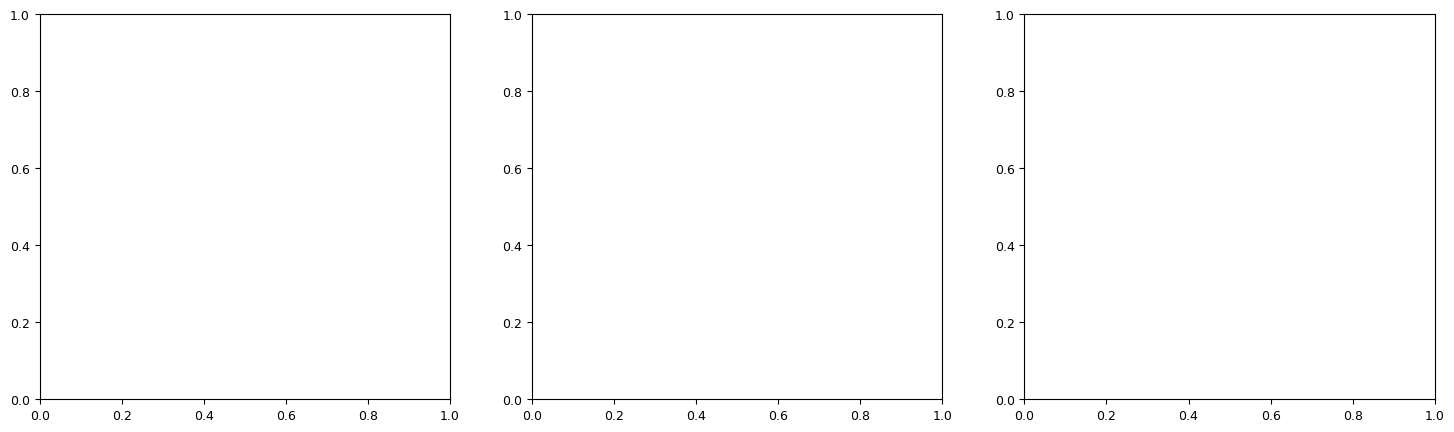

In [19]:
TEST_TRAJECTORIES = [
    'cross_illegal_8_11_1',
    'cross_left_8_6_4',
    'crossing_now_7_28_1',
]
def combine_images(image_paths, output_path):
    # Determine the number of images
    num_images = len(image_paths)
    
    # Create a matplotlib figure with multiple subplots
    fig, axes = plt.subplots(nrows=1, ncols=num_images, figsize=(num_images * 6, 5))
    
    # Check if there's only one subplot (axes could be an AxesSubplot object, not an array)
    if num_images == 1:
        axes = [axes]
    
    # Loop through the images and their respective axes
    for ax, img_path in zip(axes, image_paths):
        # Open the image file
        with Image.open(img_path) as img:
            # Convert the image file to an array
            ax.imshow(img)
            ax.axis('off')  # Hide axes
            
    plt.subplots_adjust(wspace=0, hspace=0)  # Adjust spacing between images if needed
    plt.savefig(output_path, dpi=300, bbox_inches='tight', pad_inches=0)
    plt.show()

# Example usage
image_paths = [
    ROOT_RESOURCES + f'/test/{TEST_TRAJECTORIES[0]}/use.png',
    ROOT_RESOURCES + f'/test/{TEST_TRAJECTORIES[2]}/use.png',
    ROOT_RESOURCES + f'/test/{TEST_TRAJECTORIES[1]}/use.png',
]
output_path = ROOT_RESOURCES + '/test/combined_image.jpg'

combine_images(image_paths, output_path)

### Clsuter picked for Zonotope

In [ ]:
c , l

(0, 0)

In [ ]:
_sind_, d, _, mapping = get_data(_load=True, config=config, test_case=(c, 'Cluster'))
_mode = mapping[0]
_mode

0

In [ ]:
len(d[_mode])

27

<Axes: >

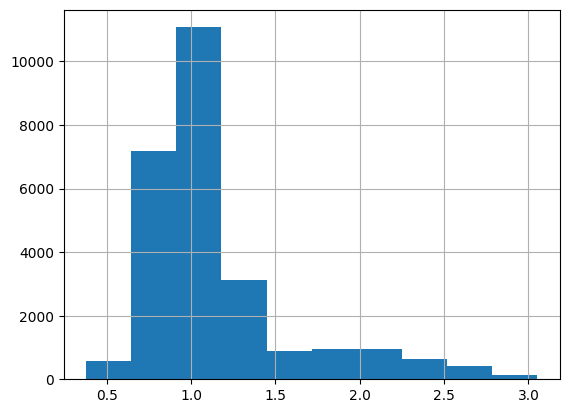

In [ ]:
import pandas as pd

df = pd.read_csv('/home/sam/Desktop/Pedestrian_Project/bags/aggregated_data.csv')

df['y'].hist()

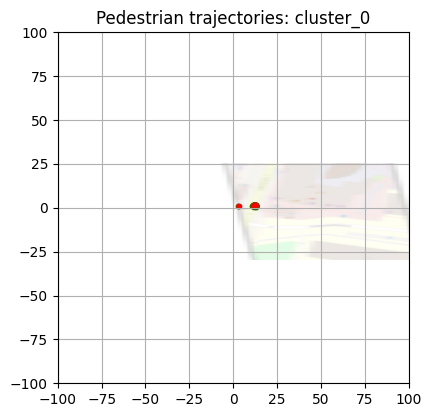

In [ ]:
_sind_.map.plot_dataset(pedestrian_data={i: data for i, data in enumerate(d[_mode])}, color='red', title=f'cluster_{c}', alpha_trajectories=0.3)